<a href="https://colab.research.google.com/github/nguyenhpnguyen/BT2103-archive/blob/main/BT2103_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("Hmisc")
library("Hmisc")

In [ ]:
install.packages("tidyverse")
library("tidyverse")

In [ ]:
install.packages("corrplot")
library(corrplot)

In [ ]:
install.packages("ggplot2")
library(ggplot2)

In [53]:
data <- read.table("card.csv",sep=",",skip=2,header=FALSE)
header <- scan("card.csv",sep=",",nlines=2,what=character())
set.seed(1234)
n = length(data$V1)
index <- 1:nrow(data)
testindex <- sample(index, trunc(n)/4)
test.data <- data[testindex,]
train.data <- data[-testindex,]

In [ ]:
data

In [8]:
sum(is.na(data))

[1] 0

In [15]:
data.cor = cor(train.data[2:25], method = c("spearman"))

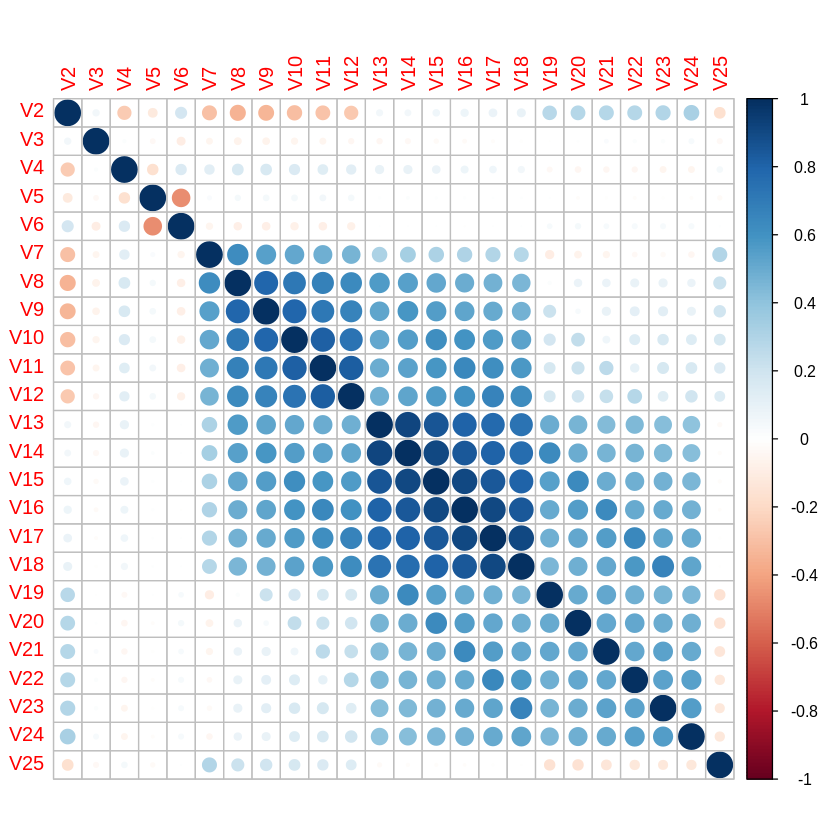

In [7]:
# Correlation Matrix
corrplot(data.cor)

**DATA TRANSFORMATION**

EDUCATION

Classify observations with categories 0, 5 and 6 in `EDUCATION` under 4=Others as others.

MARRIAGE

Classify observations with category 0 in `MARRIAGE` under 3=Others as others.

AVERAGE BILL AMOUNT

Merge `BILL_AMT` to one single column using the mean.


In [54]:
data$V4[data$V4==5] <- 4
data$V4[data$V4==6] <- 4
data$V4[data$V4==0] <- 4

In [55]:
data$V5[data$V5==0] <- 3

In [56]:
data$V3 <- as.factor(data$V3)
data$V4 <- as.factor(data$V4)
data$V5 <- as.factor(data$V5)
data$V7 <- as.factor(data$V7)
data$V8 <- as.factor(data$V8)
data$V9 <- as.factor(data$V9)
data$V10 <- as.factor(data$V10)
data$V11 <- as.factor(data$V11)
data$V12 <- as.factor(data$V12)

**DATA DISCRETISATION**

LIMIT_BAL

* Low: [10,000 - 30,000)
* Medium Low: [30,000 - 50,000)
* Medium: [50,000 - 70,000)
* Medium High: [70,000 - 90,000)
* High: 90,000 and above


AGE

* Adult: [20, 39] years olds
* Middle Age: [40-59] years old
* Senior: 60 years old and above

In [57]:
data$V2 <- ifelse(data$V2 >= 10000 & data$V2 < 30000, "Low",
           ifelse(data$V2 >= 30000 & data$V2 < 50000, "Medium Low",
           ifelse(data$V2 >= 50000 & data$V2 < 70000, "Medium",
           ifelse(data$V2 >= 30000 & data$V2 < 50000, "Medium High", "High"))))

In [59]:
data$V6 <- ifelse(data$V6 >= 20 & data$V6 < 40, "Adult",
           ifelse(data$V6 >= 40 & data$V6 < 60, "Middle Age", "Senior"))

In [ ]:
# test boxplot
ggplot(data = train.data, aes(x = factor(V25), y = V2)) +
  geom_boxplot()

In [ ]:
# test x-y graph between no. Bill Statements and Payment Amount
data$billAmt <- rowMeans(data[,13:18], na.rm = TRUE)
data$payAmt <- rowMeans(data[,19:24], na.rm = TRUE)
df <- data[,c(25,26,27)]
df$billAmtLog <- log(df$billAmt)
df$payAmtLog <- log(df$payAmt)
df <- df[is.finite(rowSums(df)),]

Warning message:
“Removed 201 rows containing missing values (geom_point).”


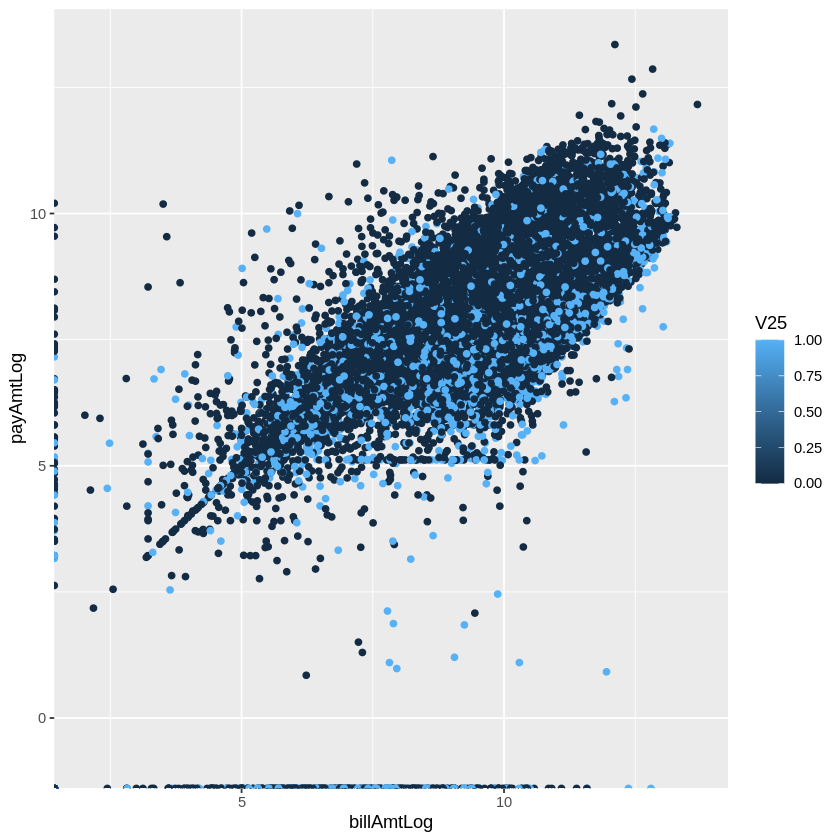

In [99]:
ggplot(df,aes(x=billAmtLog,y=payAmtLog,col=V25))+geom_point()

In [94]:
#plot(log(billAmt), log(payAmt), main = "Average Payment Amount (logarised) ~ Average No. Bill Statements (logarised)",
#     xlab = "ln(Average No. Bill Statements)", ylab = "ln(Average Payment)")
abline(lm(y ~ x, data=df), col = "blue")
summary(lm(y ~ x, data=df))

Linear model: ln(y) = 3.887074 + 0.411431 * ln(x)

Interpretation: 1% change in the mean number of bill statements will lead to 0.411% change in the mean payment amount.

In [61]:
#write.csv(data,"cardDiscreticised.csv", row.names = FALSE)

In [21]:
chisq.test(train.data$V3, train.data$V25, correct=FALSE)


	Pearson's Chi-squared test

data:  train.data$V3 and train.data$V25
X-squared = 31.843, df = 1, p-value = 1.671e-08


In [17]:
chisq.test(train.data$V4, train.data$V25, correct=FALSE)

Warning message in chisq.test(train.data$V4, train.data$V25, correct = FALSE):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  train.data$V4 and train.data$V25
X-squared = 125.27, df = 6, p-value < 2.2e-16


In [42]:
chisq.test(train.data$V6, train.data$V25, correct=FALSE)

Warning message in chisq.test(train.data$V6, train.data$V25, correct = FALSE):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  train.data$V6 and train.data$V25
X-squared = 153.22, df = 55, p-value = 3.332e-11


In [62]:
chisq.test(train.data$V2, train.data$V25, correct=FALSE)

Warning message in chisq.test(train.data$V2, train.data$V25, correct = FALSE):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  train.data$V2 and train.data$V25
X-squared = 750.61, df = 79, p-value < 2.2e-16
